# LabVIRT
Virtual Lab tool based on Matlab/Octave script for Control Engineering

## Setup: install libraries

### Scipy

In [1]:
!pip install -U -q scipy

import scipy

from scipy import io

     |████████████████████████████████| 25.9MB 150kB/s 
ERROR: tensorflow 2.3.0 has requirement scipy==1.4.1, but you'll have scipy 1.5.4 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


### Octave

In [2]:
!apt install octave

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aglfn epstool fonts-droid-fallback fonts-noto-mono ghostscript gnuplot-data
  gnuplot-qt gsfonts imagemagick-6-common info install-info libamd2
  libauthen-sasl-perl libcamd2 libccolamd2 libcholmod3 libcolamd2
  libcupsfilters1 libcupsimage2 libcxsparse3 libdata-dump-perl libemf1
  libencode-locale-perl libfftw3-single3 libfile-listing-perl libfltk-gl1.3
  libfltk1.3 libfont-afm-perl libgail-common libgail18 libglpk40
  libgraphicsmagick++-q16-12 libgraphicsmagick-q16-3 libgs9 libgs9-common
  libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libhtml-form-perl
  libhtml-format-perl libhtml-parser-perl libhtml-tagset-perl
  libhtml-tree-perl libhttp-cookies-perl libhttp-daemon-perl libhttp-date-perl
  libhttp-message-perl libhttp-negotiate-perl libijs-0.35 libio-html-perl
  libio-socket-ssl-perl libjbig2dec0 liblqr-1-0 liblua5.3-0
  liblwp-mediat

In [3]:
!apt-get install octave-control

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libslicot0
The following NEW packages will be installed:
  libslicot0 octave-control
0 upgraded, 2 newly installed, 0 to remove and 12 not upgraded.
Need to get 1,813 kB of archives.
After this operation, 5,180 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libslicot0 amd64 5.0+20101122-3build1 [1,012 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 octave-control amd64 3.0.0-5 [800 kB]
Fetched 1,813 kB in 1s (1,376 kB/s)
Selecting previously unselected package libslicot0:amd64.
(Reading database ... 152526 files and directories currently installed.)
Preparing to unpack .../libslicot0_5.0+20101122-3build1_amd64.deb ...
Unpacking libslicot0:amd64 (5.0+20101122-3build1) ...
Selecting previously unselected package octave-control.
Preparing to unpack .../octave-control_3

### Oct2Py

In [4]:
!pip install oct2py

import oct2py

from oct2py import octave as oct

     |████████████████████████████████| 51kB 4.3MB/s 
     |████████████████████████████████| 215kB 9.5MB/s 


Please refer to https://nbviewer.jupyter.org/github/blink1073/oct2py/blob/master/example/octavemagic_extension.ipynb?create=1

In [5]:
%load_ext oct2py.ipython

### Matplot

In [6]:
import matplotlib.pyplot as plt

## Build and Run Matlab script

### Minimal Example

Please refer to: https://colab.research.google.com/drive/1x7Sgb-Io9iYCE-YEtx8zi7K8mXzBWAeC#scrollTo=7o_LGZZiZrDD

In [7]:
%%writefile add.m
x = 1
y = 2
display(x+y)

Writing add.m


In [8]:
# -W : no window system
!octave -W add.m

x =  1
y =  2
 3


### Another minimal example

Please refer to https://nbviewer.jupyter.org/github/blink1073/oct2py/blob/master/example/octavemagic_extension.ipynb?create=1

In [9]:
x = %octave [1 2; 3 4];
x

array([[1., 2.],
       [3., 4.]])

In [10]:
%%octave -i x -o U,S,V
[U, S, V] = svd(x)

U =

  -0.40455  -0.91451

  -0.91451   0.40455

S =

Diagonal Matrix

   5.46499         0

         0   0.36597

V =

  -0.57605   0.81742

  -0.81742  -0.57605

12*x^4 - 2.5*x^3 - 8*x^2 - 0.1*x^1 + 8

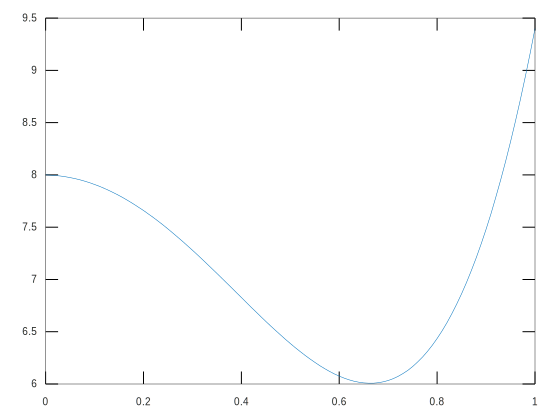

In [11]:
%%octave -f svg

p = [12 -2.5 -8 -0.1 8];
x = 0:0.01:1;

polyout(p, 'x')
plot(x, polyval(p, x));

### Control Engineering Example

In [12]:
%%writefile control.m
pkg load control

% Controlador PID:
Kp = 1;
Ki = 1;
Kd = 1;

s = tf('s');
C = Kp + Ki/s + Kd*s

% Planta Motor DC:
s = tf('s');
P = 1/(s*(s+2));

% PID parâmetros obtidos com o método de Ziegler Nichols:
Kp = 1.9;
Ki = 0.2;
Kd = 0.05;
C = pid(Kp,Ki,Kd)
T = feedback(C*P,1)

% Plotar 20 segundos com passo 0.01s:
t = 0:0.01:20;
step(T,t)

Writing control.m


In [13]:
# -W : no window system
!octave -W control.m


Transfer function 'C' from input 'u1' to output ...

      s^2 + s + 1
 y1:  -----------
           s     

Continuous-time model.

Transfer function 'C' from input 'u1' to output ...

      0.05 s^2 + 1.9 s + 0.2
 y1:  ----------------------
                s           

Continuous-time model.

Transfer function 'T' from input 'u1' to output ...

         0.05 s^2 + 1.9 s + 0.2   
 y1:  ----------------------------
      s^3 + 2.05 s^2 + 1.9 s + 0.2

Continuous-time model.


In [14]:
%octave t = 0:0.01:20;
%octave_pull t

In [15]:
t

array([[0.000e+00, 1.000e-02, 2.000e-02, ..., 1.998e+01, 1.999e+01,
        2.000e+01]])

In [16]:
# %%octave -f svg
%%octave -i t -o p

pkg load control

% Controlador PID:
Kp = 1;
Ki = 1;
Kd = 1;

s = tf('s');
C = Kp + Ki/s + Kd*s

% Planta Motor DC:
s = tf('s');
P = 1/(s*(s+2));

% PID parâmetros obtidos com o método de Ziegler Nichols:
Kp = 1.9; %1.9
Ki = 0.2; %0.2
Kd = 5; %0.05
C = pid(Kp,Ki,Kd)
T = feedback(C*P,1)

t = 0:0.01:20;

% p = T(t);
p = step(T,t);

% polyout(p, 'x')
% plot(x, polyval(p, x));

Transfer function 'C' from input 'u1' to output ...

      s^2 + s + 1

 y1:  -----------

           s

Continuous-time model.

Transfer function 'C' from input 'u1' to output ...

      5 s^2 + 1.9 s + 0.2

 y1:  -------------------

               s

Continuous-time model.

Transfer function 'T' from input 'u1' to output ...

         5 s^2 + 1.9 s + 0.2

 y1:  -------------------------

      s^3 + 7 s^2 + 1.9 s + 0.2

Continuous-time model.

In [17]:
p

array([[0.        ],
       [0.04838145],
       [0.09366683],
       ...,
       [1.02947985],
       [1.02944267],
       [1.02940551]])

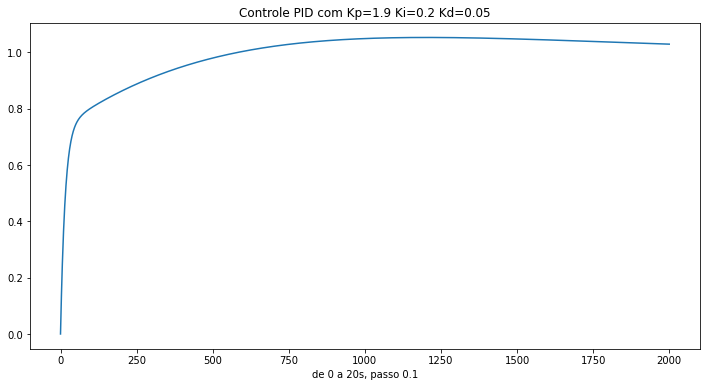

In [18]:
plt.figure(figsize=(12,6))
plt.plot(p)
plt.title('Controle PID com Kp=1.9 Ki=0.2 Kd=0.05')
plt.xlabel('de 0 a 20s, passo 0.1')
plt.show()